# Decision Tree Regression (using DecisionTrees.jl)

Adapted from http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

A 1D regression with decision tree.

The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.

INFO: Recompiling stale cache file /Users/cedric/.julia/lib/v0.6/DecisionTree.ji for module DecisionTree.
INFO: Recompiling stale cache file /Users/cedric/.julia/lib/v0.6/ScikitLearn.ji for module ScikitLearn.
INFO: Recompiling stale cache file /Users/cedric/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


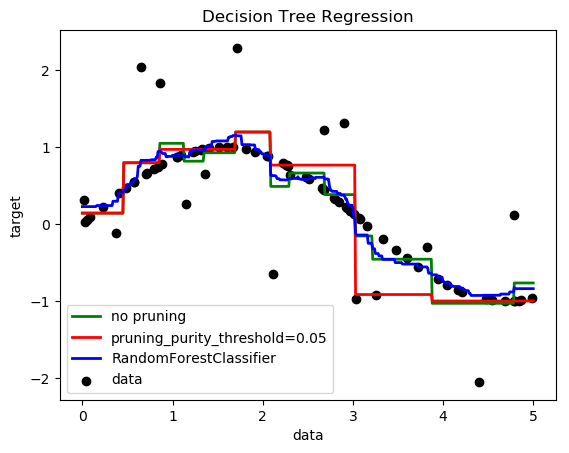

In [1]:
using DecisionTree
using ScikitLearn, Random, Statistics
using PyPlot

# Create a random dataset
Random.seed!(42)
X = sort(5 * rand(80))
XX = reshape(X, 80, 1)
y = sin.(X)
y[1:5:end] += 3 * (0.5 .- rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor()
regr_2 = DecisionTreeRegressor(pruning_purity_threshold=0.05)
regr_3 = RandomForestRegressor(n_trees=20)
fit!(regr_1, XX, y)
fit!(regr_2, XX, y)
fit!(regr_3, XX, y)

# Predict
X_test = 0:0.01:5.0
y_1 = predict(regr_1, hcat(X_test))
y_2 = predict(regr_2, hcat(X_test))
y_3 = predict(regr_3, hcat(X_test))

# Plot the results
scatter(X, y, c="k", label="data")
plot(X_test, y_1, c="g", label="no pruning", linewidth=2)
plot(X_test, y_2, c="r", label="pruning_purity_threshold=0.05", linewidth=2)
plot(X_test, y_3, c="b", label="RandomForestClassifier", linewidth=2)
xlabel("data")
ylabel("target")
title("Decision Tree Regression")
legend(prop=Dict("size"=>10));